In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import random
import numpy as np

In [2]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
##Load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


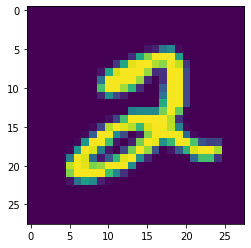

Letter is  2


In [5]:
from matplotlib import pyplot as plt
plt.imshow(x_train[5])
plt.show()
print("Letter is ",y_train[5])

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
#
x_train = x_train.reshape(-1,28,28,1) 
x_test = x_test.reshape(-1,28,28,1)

In [8]:
print(x_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [9]:
print(y_train)

[5 0 4 ... 5 6 8]


In [10]:

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(28,28,1)))# 10 filter/kernal(node in case of DNN) with 3*3 size , gray scale-(28,28,1),colur-(28,28,3)

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.Flatten())

cnnModel.add(layers.Dense(64, activation="relu"))

cnnModel.add(layers.Dense(32, activation="relu"))

cnnModel.add(layers.Dense(10, activation="softmax")) # multiple class

cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        5824      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
cnnModel.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
history = cnnModel.fit(x_train, y_train, epochs=20, batch_size=32,  validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 36s 18ms/step - loss: 0.2453 - accuracy: 0.9358 - val_loss: 0.0578 - val_accuracy: 0.9837
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0569 - val_accuracy: 0.9839
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 4/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0408 - accuracy: 0.9878 - val_loss: 0.0437 - val_accuracy: 0.9870
Epoch 5/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0480 - val_accuracy: 0.9871
Epoch 6/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0561 - val_accuracy: 0.9870
Epoch 7/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0452 -

In [15]:
testLoss, testAccuracy = cnnModel.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0695 - accuracy: 0.9874


In [16]:
y_pred = cnnModel.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
print(y_pred)

In [ ]:
tf.math.confusion_matrix(np.argmax(y_test, axis=1),y_pred)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')